In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import matplotlib as mpl
from util.stragglers import straggler_freq,task_hist,straggler_samples
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

# Fluctuations due to data size

In [2]:
wrangler_mpicppx1 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_mpic++_NoIO.csv').drop(['Framework'],axis=1)
wrangler_mpicppx2 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_mpic++_NoIOx2.csv').drop(['Framework'],axis=1)
wrangler_mpicppx4 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_mpic++_NoIOx4.csv').drop(['Framework'],axis=1)
wrangler_mpicppx8 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_mpic++_NoIOx8.csv').drop(['Framework'],axis=1)
comet_mpicppx1    = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_mpic++_NoIO.csv').drop(['Framework'],axis=1)
supermic_mpicppx1 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/supermic_mpic++_NoIO.csv').drop(['Framework'],axis=1)
juliet_mpicppx1   = pd.DataFrame.from_csv('stragglers/tidy_data/juliet_mpic++NoIOx1.csv')

comet_mpi4py = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_mpi4py_NoIO.csv').drop(['Framework'],axis=1)
comet_dask   = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_dask_NoIO.csv').drop(['Framework'],axis=1)
comet_spark  = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_spark_NoIO.csv').drop(['Framework'],axis=1)
comet_rp     = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/comet_rp_NoIO.csv').drop(['Framework'],axis=1)

wrangler_mpi4py = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_mpi4py_NoIO.csv').drop(['Framework'],axis=1)
wrangler_dask   = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_dask_NoIO.csv').drop(['Framework'],axis=1)
wrangler_spark  = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_spark_NoIO.csv').drop(['Framework'],axis=1)
wrangler_rp     = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_rp_NoIO.csv').drop(['Framework'],axis=1)

In [3]:
_,_,meanWranglerMpiCpp1,_,maxWranglerMpiCpp1,_  = task_hist(df=wrangler_mpicppx1,node=1,bins=40,div=1000000.0)
_,_,meanCometMpiCpp1,   _,maxCometMpiCpp1,_     = task_hist(df=comet_mpicppx1,node=1,bins=40,div=1000000.0)
_,_,meanSuperMicMpiCpp1,_,maxSuperMicMpiCppx1,_ = task_hist(df=supermic_mpicppx1,node=1,bins=40,div=1000000.0)
_,_,meanJulietMpiCpp1,  _,maxJulietMpiCpp1,_    = task_hist(df=juliet_mpicppx1,node=1,bins=40,div=1000.0)
_,_,meanCometMpi4py1,   _,maxCometMpi4py1,_     = task_hist(df=comet_mpi4py,node=1,bins=40)
_,_,meanWranglerMpi4py1,_,maxWranglerMpi4py1,_  = task_hist(df=wrangler_mpi4py,node=1,bins=20)
_,_,meanCometDask1,     _,maxCometDask1,_       = task_hist(df=comet_dask,node=1,div=1000.0,bins=20)
_,_,meanWranglerDask1,  _,maxWranglerDask1,_    = task_hist(df=wrangler_dask,div=1000.0,node=1,bins=20)
_,_,meanCometSpark1,    _,maxCometSpark1,_      = task_hist(df=comet_spark,div=1000.0,node=1,bins=20)
_,_,meanWranglerSpark1, _,maxWranglerSpark1,_   = task_hist(df=wrangler_spark,div=1000.0,node=1,bins=20)
_,_,meanCometRp1,       _,maxCometRp1,_         = task_hist(df=comet_rp,node=1,bins=20)
_,_,meanWranglerRp1,    _,maxWranglerRp1,_      = task_hist(df=wrangler_rp,node=1,bins=20)

impactWranglerMpiCpp1 = ((maxWranglerMpiCpp1-meanWranglerMpiCpp1)/meanWranglerMpiCpp1)*100
impactCometMpiCpp1    = ((maxCometMpiCpp1-meanCometMpiCpp1)/meanCometMpiCpp1)*100
impactSuperMicMpiCpp1 = ((maxSuperMicMpiCppx1-meanSuperMicMpiCpp1)/meanSuperMicMpiCpp1)*100
impactJulietMpiCpp1   = ((maxJulietMpiCpp1-meanJulietMpiCpp1)/meanJulietMpiCpp1)*100
impactWranglerMpi4py1 = ((maxWranglerMpi4py1-meanWranglerMpi4py1)/meanWranglerMpi4py1)*100
impactCometMpi4py1    = ((maxCometMpi4py1-meanCometMpi4py1)/meanCometMpi4py1)*100
impactWranglerDask1   = ((maxWranglerDask1-meanWranglerDask1)/meanWranglerDask1)*100
impactCometDask1      = ((maxCometDask1-meanCometDask1)/meanCometDask1)*100
impactWranglerSpark1  = ((maxWranglerSpark1-meanWranglerSpark1)/meanWranglerSpark1)*100
impactCometSpark1     = ((maxCometSpark1-meanCometSpark1)/meanCometSpark1)*100
impactWranglerRp1     = ((maxWranglerRp1-meanWranglerRp1)/meanWranglerRp1)*100
impactCometRp1        = ((maxCometRp1-meanCometRp1)/meanCometRp1)*100


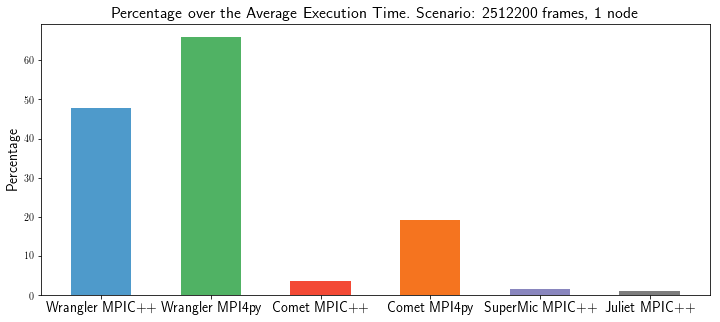

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[12,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
width = 0.55

axes.bar(0,impactWranglerMpiCpp1,color=blues(150),width=width,label='Wrangler MPIC++')
axes.bar(1,impactWranglerMpi4py1,color=greens(150),width=width,label='Wrangler MPI4py')
axes.bar(2,impactCometMpiCpp1,color=reds(150),width=width,label='Comet MPIC++')
axes.bar(3,impactCometMpi4py1,color=oranges(150),width=width,label='Comet MPI4py')
axes.bar(4,impactSuperMicMpiCpp1,color=purples(150),width=width,label='SuperMic MPIC++')
axes.bar(5,impactJulietMpiCpp1,color=greys(150),width=width,label='Juliet MPIC++')
axes.set_xticks([0,1,2,3,4,5])
axes.set_xticklabels(['Wrangler MPIC++','Wrangler MPI4py','Comet MPIC++','Comet MPI4py','SuperMic MPIC++','Juliet MPIC++'],fontsize=14)
axes.set_ylabel('Percentage',fontsize=14)
axes.set_title('Percentage over the Average Execution Time. Scenario: 2512200 frames, 1 node',fontsize=16)

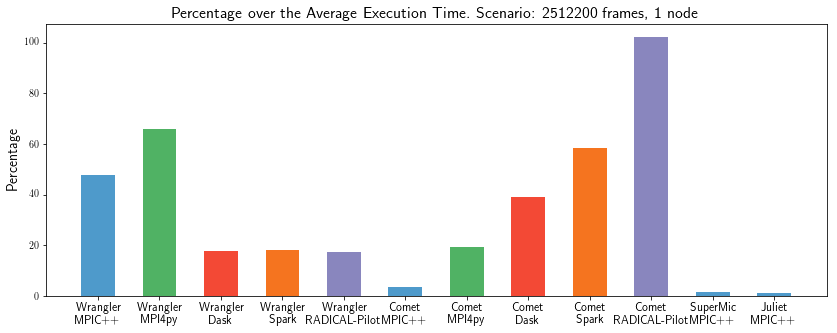

In [5]:
fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[14,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
width = 0.55

axes.bar(0,impactWranglerMpiCpp1,color=blues(150),width=width,label='Wrangler MPIC++')
axes.bar(1,impactWranglerMpi4py1,color=greens(150),width=width,label='Wrangler MPI4py')
axes.bar(2,impactWranglerDask1,color=reds(150),width=width,label='Wrangler Dask')
axes.bar(3,impactWranglerSpark1,color=oranges(150),width=width,label='Wrangler Spark')
axes.bar(4,impactWranglerRp1,color=purples(150),width=width,label='Wrangler RADICAL-Pilot')
axes.bar(5,impactCometMpiCpp1,color=blues(150),width=width,label='Comet MPIC++')
axes.bar(6,impactCometMpi4py1,color=greens(150),width=width,label='Comet MPI4py')
axes.bar(7,impactCometDask1,color=reds(150),width=width,label='Comet Dask')
axes.bar(8,impactCometSpark1,color=oranges(150),width=width,label='Comet Spark')
axes.bar(9,impactCometRp1,color=purples(150),width=width,label='Comet RADICAL-Pilot')
axes.bar(10,impactSuperMicMpiCpp1,color=blues(150),width=width,label='SuperMic MPIC++')
axes.bar(11,impactJulietMpiCpp1,color=blues(150),width=width,label='Juliet MPIC++')
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
axes.set_xticklabels(['Wrangler\nMPIC++','Wrangler\nMPI4py','Wrangler\nDask','Wrangler\nSpark','Wrangler\nRADICAL-Pilot','Comet\nMPIC++','Comet\nMPI4py',\
                      'Comet\nDask','Comet\nSpark','Comet\nRADICAL-Pilot','SuperMic\nMPIC++','Juliet\nMPIC++'],fontsize=12)
axes.set_ylabel('Percentage',fontsize=14)
axes.set_title('Percentage over the Average Execution Time. Scenario: 2512200 frames, 1 node',fontsize=16)

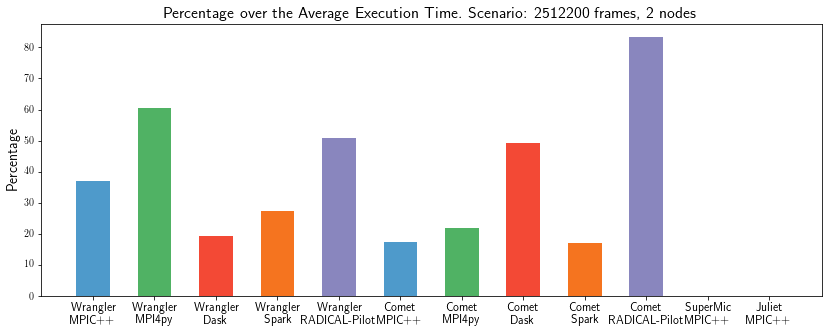

In [6]:
_,_,meanWranglerMpiCpp2,_,maxWranglerMpiCpp2,_  = task_hist(df=wrangler_mpicppx1,node=2,bins=40,div=1000000.0)
_,_,meanCometMpiCpp2,   _,maxCometMpiCpp2,_     = task_hist(df=comet_mpicppx1,node=2,bins=40,div=1000000.0)
#_,_,meanSuperMicMpiCpp2,_,maxSuperMicMpiCppx2,_ = task_hist(df=supermic_mpicppx1,node=2,bins=40,div=1000000.0)
#_,_,meanJulietMpiCpp2,  _,maxJulietMpiCpp2,_    = task_hist(df=juliet_mpicppx1,node=2,bins=40,div=1000.0)
_,_,meanCometMpi4py2,   _,maxCometMpi4py2,_     = task_hist(df=comet_mpi4py,node=2,bins=40)
_,_,meanWranglerMpi4py2,_,maxWranglerMpi4py2,_  = task_hist(df=wrangler_mpi4py,node=2,bins=20)
_,_,meanCometDask2,     _,maxCometDask2,_       = task_hist(df=comet_dask,node=2,div=1000.0,bins=20)
_,_,meanWranglerDask2,  _,maxWranglerDask2,_    = task_hist(df=wrangler_dask,div=1000.0,node=2,bins=20)
_,_,meanCometSpark2,    _,maxCometSpark2,_      = task_hist(df=comet_spark,div=1000.0,node=2,bins=20)
_,_,meanWranglerSpark2, _,maxWranglerSpark2,_   = task_hist(df=wrangler_spark,div=1000.0,node=2,bins=20)
_,_,meanCometRp2,       _,maxCometRp2,_         = task_hist(df=comet_rp,node=2,bins=20)
_,_,meanWranglerRp2,    _,maxWranglerRp2,_      = task_hist(df=wrangler_rp,node=2,bins=20)

impactWranglerMpiCpp2 = ((maxWranglerMpiCpp2-meanWranglerMpiCpp2)/meanWranglerMpiCpp2)*100
impactCometMpiCpp2    = ((maxCometMpiCpp2-meanCometMpiCpp2)/meanCometMpiCpp2)*100
#impactSuperMicMpiCpp2 = ((maxSuperMicMpiCppx2-meanSuperMicMpiCpp2)/meanSuperMicMpiCpp2)*100
#impactJulietMpiCpp2   = ((maxJulietMpiCpp2-meanJulietMpiCpp2)/meanJulietMpiCpp2)*100
impactWranglerMpi4py2 = ((maxWranglerMpi4py2-meanWranglerMpi4py2)/meanWranglerMpi4py2)*100
impactCometMpi4py2    = ((maxCometMpi4py2-meanCometMpi4py2)/meanCometMpi4py2)*100
impactWranglerDask2   = ((maxWranglerDask2-meanWranglerDask2)/meanWranglerDask2)*100
impactCometDask2      = ((maxCometDask2-meanCometDask2)/meanCometDask2)*100
impactWranglerSpark2  = ((maxWranglerSpark2-meanWranglerSpark2)/meanWranglerSpark2)*100
impactCometSpark2     = ((maxCometSpark2-meanCometSpark2)/meanCometSpark2)*100
impactWranglerRp2     = ((maxWranglerRp2-meanWranglerRp2)/meanWranglerRp2)*100
impactCometRp2        = ((maxCometRp2-meanCometRp2)/meanCometRp2)*100

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[14,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
width = 0.55

axes.bar(0,impactWranglerMpiCpp2,color=blues(150),width=width,label='Wrangler MPIC++')
axes.bar(1,impactWranglerMpi4py2,color=greens(150),width=width,label='Wrangler MPI4py')
axes.bar(2,impactWranglerDask2,color=reds(150),width=width,label='Wrangler Dask')
axes.bar(3,impactWranglerSpark2,color=oranges(150),width=width,label='Wrangler Spark')
axes.bar(4,impactWranglerRp2,color=purples(150),width=width,label='Wrangler RADICAL-Pilot')
axes.bar(5,impactCometMpiCpp2,color=blues(150),width=width,label='Comet MPIC++')
axes.bar(6,impactCometMpi4py2,color=greens(150),width=width,label='Comet MPI4py')
axes.bar(7,impactCometDask2,color=reds(150),width=width,label='Comet Dask')
axes.bar(8,impactCometSpark2,color=oranges(150),width=width,label='Comet Spark')
axes.bar(9,impactCometRp2,color=purples(150),width=width,label='Comet RADICAL-Pilot')
axes.bar(10,0,color=blues(150),width=width,label='SuperMic MPIC++')
axes.bar(11,0,color=blues(150),width=width,label='Juliet MPIC++')
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
axes.set_xticklabels(['Wrangler\nMPIC++','Wrangler\nMPI4py','Wrangler\nDask','Wrangler\nSpark','Wrangler\nRADICAL-Pilot','Comet\nMPIC++','Comet\nMPI4py',\
                      'Comet\nDask','Comet\nSpark','Comet\nRADICAL-Pilot','SuperMic\nMPIC++','Juliet\nMPIC++'],fontsize=12)
axes.set_ylabel('Percentage',fontsize=14)
axes.set_title('Percentage over the Average Execution Time. Scenario: 2512200 frames, 2 nodes',fontsize=16)

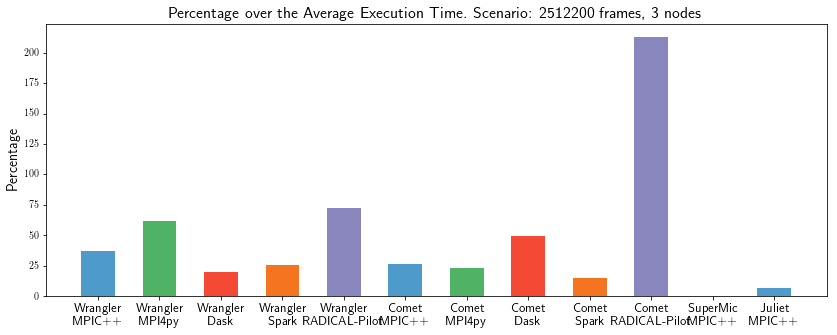

In [7]:
_,_,meanWranglerMpiCpp3,_,maxWranglerMpiCpp3,_  = task_hist(df=wrangler_mpicppx1,node=3,bins=40,div=1000000.0)
_,_,meanCometMpiCpp3,   _,maxCometMpiCpp3,_     = task_hist(df=comet_mpicppx1,node=3,bins=40,div=1000000.0)
#_,_,meanSuperMicMpiCpp3,_,maxSuperMicMpiCppx3,_ = task_hist(df=supermic_mpicppx1,node=3,bins=40,div=1000000.0)
_,_,meanJulietMpiCpp3,  _,maxJulietMpiCpp3,_    = task_hist(df=juliet_mpicppx1,node=3,bins=40,div=1000.0)
_,_,meanCometMpi4py3,   _,maxCometMpi4py3,_     = task_hist(df=comet_mpi4py,node=3,bins=40)
_,_,meanWranglerMpi4py3,_,maxWranglerMpi4py3,_  = task_hist(df=wrangler_mpi4py,node=3,bins=20)
_,_,meanCometDask3,     _,maxCometDask3,_       = task_hist(df=comet_dask,node=3,div=1000.0,bins=20)
_,_,meanWranglerDask3,  _,maxWranglerDask3,_    = task_hist(df=wrangler_dask,div=1000.0,node=3,bins=20)
_,_,meanCometSpark3,    _,maxCometSpark3,_      = task_hist(df=comet_spark,div=1000.0,node=3,bins=20)
_,_,meanWranglerSpark3, _,maxWranglerSpark3,_   = task_hist(df=wrangler_spark,div=1000.0,node=3,bins=20)
_,_,meanCometRp3,       _,maxCometRp3,_         = task_hist(df=comet_rp,node=3,bins=20)
_,_,meanWranglerRp3,    _,maxWranglerRp3,_      = task_hist(df=wrangler_rp,node=3,bins=20)

impactWranglerMpiCpp3 = ((maxWranglerMpiCpp3-meanWranglerMpiCpp3)/meanWranglerMpiCpp3)*100
impactCometMpiCpp3    = ((maxCometMpiCpp3-meanCometMpiCpp3)/meanCometMpiCpp3)*100
#impactSuperMicMpiCpp2 = ((maxSuperMicMpiCppx3-meanSuperMicMpiCpp3)/meanSuperMicMpiCpp3)*100
impactJulietMpiCpp3   = ((maxJulietMpiCpp3-meanJulietMpiCpp3)/meanJulietMpiCpp3)*100
impactWranglerMpi4py3 = ((maxWranglerMpi4py3-meanWranglerMpi4py3)/meanWranglerMpi4py3)*100
impactCometMpi4py3    = ((maxCometMpi4py3-meanCometMpi4py3)/meanCometMpi4py3)*100
impactWranglerDask3   = ((maxWranglerDask3-meanWranglerDask3)/meanWranglerDask3)*100
impactCometDask3      = ((maxCometDask3-meanCometDask3)/meanCometDask3)*100
impactWranglerSpark3  = ((maxWranglerSpark3-meanWranglerSpark3)/meanWranglerSpark3)*100
impactCometSpark3     = ((maxCometSpark3-meanCometSpark3)/meanCometSpark3)*100
impactWranglerRp3     = ((maxWranglerRp3-meanWranglerRp3)/meanWranglerRp3)*100
impactCometRp3        = ((maxCometRp3-meanCometRp3)/meanCometRp3)*100

fig,axes = plt.subplots(nrows=1,ncols=1, sharex=True,sharey=True,figsize=[14,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
width = 0.55

axes.bar(0,impactWranglerMpiCpp3,color=blues(150),width=width,label='Wrangler MPIC++')
axes.bar(1,impactWranglerMpi4py3,color=greens(150),width=width,label='Wrangler MPI4py')
axes.bar(2,impactWranglerDask3,color=reds(150),width=width,label='Wrangler Dask')
axes.bar(3,impactWranglerSpark3,color=oranges(150),width=width,label='Wrangler Spark')
axes.bar(4,impactWranglerRp3,color=purples(150),width=width,label='Wrangler RADICAL-Pilot')
axes.bar(5,impactCometMpiCpp3,color=blues(150),width=width,label='Comet MPIC++')
axes.bar(6,impactCometMpi4py3,color=greens(150),width=width,label='Comet MPI4py')
axes.bar(7,impactCometDask3,color=reds(150),width=width,label='Comet Dask')
axes.bar(8,impactCometSpark3,color=oranges(150),width=width,label='Comet Spark')
axes.bar(9,impactCometRp3,color=purples(150),width=width,label='Comet RADICAL-Pilot')
axes.bar(10,0,color=blues(150),width=width,label='SuperMic MPIC++')
axes.bar(11,impactJulietMpiCpp3,color=blues(150),width=width,label='Juliet MPIC++')
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
axes.set_xticklabels(['Wrangler\nMPIC++','Wrangler\nMPI4py','Wrangler\nDask','Wrangler\nSpark','Wrangler\nRADICAL-Pilot','Comet\nMPIC++','Comet\nMPI4py',\
                      'Comet\nDask','Comet\nSpark','Comet\nRADICAL-Pilot','SuperMic\nMPIC++','Juliet\nMPIC++'],fontsize=13)
axes.set_ylabel('Percentage',fontsize=14)
axes.set_title('Percentage over the Average Execution Time. Scenario: 2512200 frames, 3 nodes',fontsize=16)